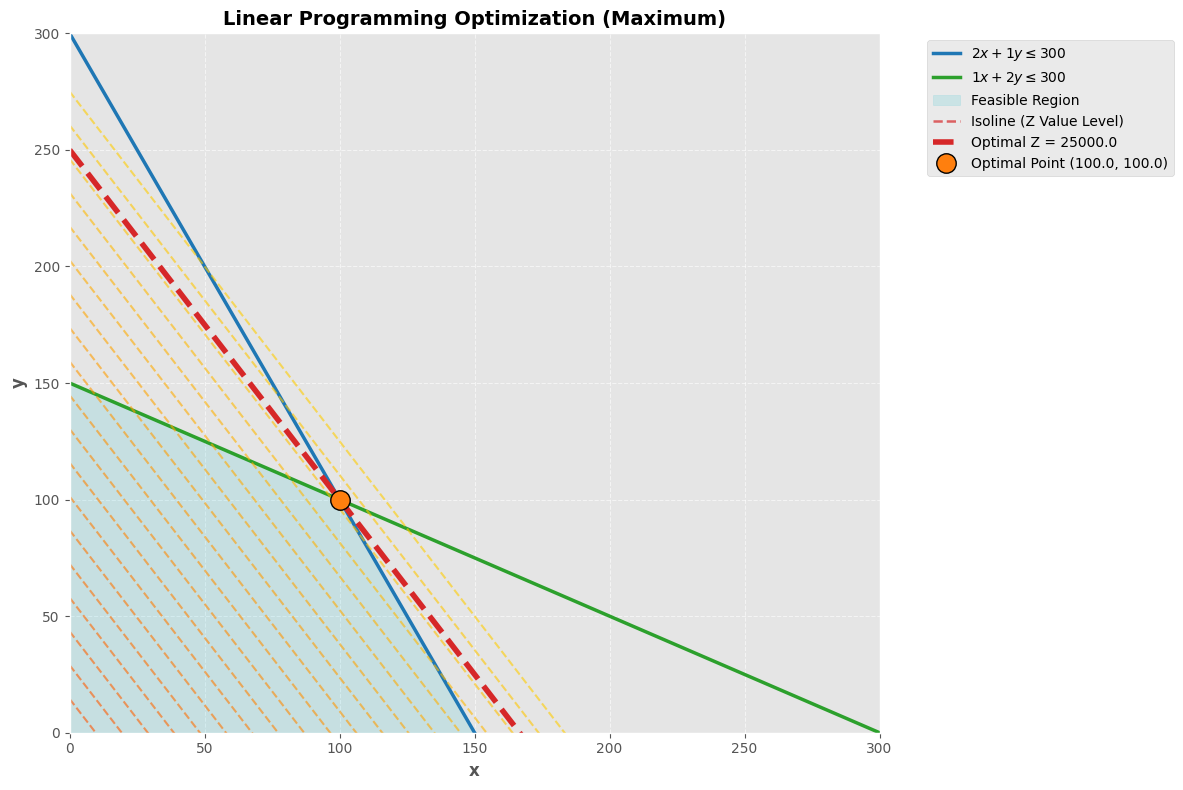


=== ANALYSIS RESULTS ===
Feasible Region Corner Points:
[1] (150.0, 0.0) → Z = 22500.0
[2] (0.0, 150.0) → Z = 15000.0
[3] (100.0, 100.0) → Z = 25000.0

★ OPTIMAL SOLUTION ★
Position: (100.0, 100.0)
Z Value: 25000.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def max(a1, b1, c1, a2, b2, c2, g, h, x_max, y_max):
    """
    Visualize linear programming with 2 constraints and an objective function

    Parameters:
        a1, b1, c1 : Coefficients for constraint 1 (a1*x + b1*y ≤ c1)
        a2, b2, c2 : Coefficients for constraint 2 (a2*x + b2*y ≤ c2)
        g, h       : Coefficients for objective function (Z = g*x + h*y)
        x_max      : Maximum x-axis limit
        y_max      : Maximum y-axis limit
    """
    # Objective function
    def objective_function(x, Z):
        return (Z - g*x)/h if h != 0 else np.zeros_like(x)

    # Constraint functions
    def constraint1(x):
        return (c1 - a1*x)/b1 if b1 != 0 else np.zeros_like(x)

    def constraint2(x):
        return (c2 - a2*x)/b2 if b2 != 0 else np.zeros_like(x)

    # Generate x values
    x = np.linspace(0, x_max, 1000)

    # Plot setup
    plt.figure(figsize=(12, 8))
    plt.style.use('ggplot')

    # Plot constraints
    plt.plot(x, constraint1(x), label=f'${a1}x + {b1}y \\leq {c1}$', color='#1f77b4', linewidth=2.5)
    plt.plot(x, constraint2(x), label=f'${a2}x + {b2}y \\leq {c2}$', color='#2ca02c', linewidth=2.5)

    # Shade feasible region
    y_feasible = np.minimum(constraint1(x), constraint2(x))
    plt.fill_between(x, 0, y_feasible, where=(y_feasible >= 0), alpha=0.15, color='#17becf', label='Feasible Region')

    # Find optimal point
    A = np.array([[a1, b1], [a2, b2]])
    b = np.array([c1, c2])

    try:
        optimal_point = np.linalg.solve(A, b)
        optimal_x, optimal_y = optimal_point
        optimal_Z = g*optimal_x + h*optimal_y

        # Isoline lines
        Z_values = np.linspace(0, optimal_Z*1.1, 20)
        colors = plt.cm.autumn(np.linspace(0.3, 0.8, len(Z_values)))

        # Add legend entry for isolines
        plt.plot([], [], '--', color='#d62728', alpha=0.7, linewidth=1.8,
                label='Isoline (Z Value Level)')

        for i, Z in enumerate(Z_values):
            y_isol = objective_function(x, Z)
            linewidth = 3 if Z == optimal_Z else 1.5
            alpha = 1.0 if Z == optimal_Z else 0.6
            plt.plot(x, y_isol, '--', color=colors[i], alpha=alpha, linewidth=linewidth,
                     label=f'Z = {Z:.0f}' if Z == optimal_Z else "")

        # Optimal line and point
        y_optimal = objective_function(x, optimal_Z)
        plt.plot(x, y_optimal, '--', color='#d62728', alpha=1.0, linewidth=4, label=f'Optimal Z = {optimal_Z:.1f}')
        plt.plot(optimal_x, optimal_y, 'o', markersize=14, markeredgecolor='black', markerfacecolor='#ff7f0e',
                 label=f'Optimal Point ({optimal_x:.1f}, {optimal_y:.1f})')

    except np.linalg.LinAlgError:
        print("Constraints are parallel/do not intersect")

    # Styling
    plt.xlabel('x', fontsize=12, fontweight='bold')
    plt.ylabel('y', fontsize=12, fontweight='bold')
    plt.title('Linear Programming Optimization (Maximum)', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, y_max)
    plt.xlim(0, x_max)
    plt.tight_layout()
    plt.show()

    # Calculate all corner points
    corner_points = []

    corner_points.append((min(c1/a1, c2/a2, x_max), 0.0))  # Intersection with x-axis
    corner_points.append((0.0, min(c1/b1, c2/b2, y_max)))  # Intersection with y-axis

    try:
        intersection = np.linalg.solve([[a1, b1], [a2, b2]], [c1, c2])
        if 0 <= intersection[0] <= x_max and 0 <= intersection[1] <= y_max:
            corner_points.append((float(intersection[0]), float(intersection[1])))
    except:
        pass

    corner_points = [(float(x), float(y)) for x, y in corner_points]

    Z_values = [g*x + h*y for (x,y) in corner_points]
    max_index = np.argmax(Z_values)

    print("\n=== ANALYSIS RESULTS ===")
    print("Feasible Region Corner Points:")
    for i, (point, z) in enumerate(zip(corner_points, Z_values)):
        print(f"[{i+1}] ({point[0]:.1f}, {point[1]:.1f}) → Z = {z:.1f}")

    print(f"\n★ OPTIMAL SOLUTION ★")
    print(f"Position: ({corner_points[max_index][0]:.1f}, {corner_points[max_index][1]:.1f})")
    print(f"Z Value: {Z_values[max_index]:.1f}")

# Example usage with clear parameters:
max(
    a1=2, b1=1, c1=300,   # Constraint 1: 2x + y ≤ 300
    a2=1, b2=2, c2=300,   # Constraint 2: x + 2y ≤ 300
    g=150, h=100,         # Objective function: Z = 150x + 100y
    x_max=300, y_max=300  # Plot limits
)